# Introduction

## Context 

<div class="alert alert-block alert-warning">
<b>Todo : </b>brief overview of project goals</div>



## Data sources

<div class="alert alert-block alert-warning">
<b>Todo : </b>Links to download data</div>



## Imports

In [45]:
# builtin
import os

# data
import numpy as np
import scipy
import pandas as pd

# graphs
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

sns.set()

# Custom functions
from my_EDA_functions import show_values

## Project file structure

In [2]:
!tree -L 3 .

.
├── P7_01_EDA.ipynb
├── __pycache__
│   └── my_EDA_functions.cpython-39.pyc
├── lightgbm_with_simple_features.py
├── my_EDA_functions.py
├── nohup.out
└── src
    ├── HomeCredit_columns_description.csv
    ├── POS_CASH_balance.csv
    ├── application_test.csv
    ├── application_train.csv
    ├── bureau.csv
    ├── bureau_balance.csv
    ├── credit_card_balance.csv
    ├── installments_payments.csv
    ├── previous_application.csv
    └── sample_submission.csv

3 directories, 15 files


In [2]:
# sort csv files by number of lines
! wc -l src/* | sort -r

 58538866 total
 3840313 src/credit_card_balance.csv
 27299926 src/bureau_balance.csv
 1716429 src/bureau.csv
 1670215 src/previous_application.csv
 13605402 src/installments_payments.csv
 10001359 src/POS_CASH_balance.csv
  307512 src/application_train.csv
   48745 src/sample_submission.csv
   48745 src/application_test.csv
     220 src/HomeCredit_columns_description.csv


## Data imports

In [96]:
app_train = pd.read_csv("src/application_train.csv")
app_test = pd.read_csv("src/application_test.csv")

<div class="alert alert-block alert-warning">
<b>Todo : </b>explore other files</div>

# First look at data

In [197]:
# Shape
print("app_train : ", app_train.shape)
print("app_test : ", app_test.shape)

app_train :  (307511, 122)
app_test :  (48744, 121)


In [198]:
app_train.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [199]:
# Column names and dtypes
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [158]:
app_train.select_dtypes("object").nunique()

Series([], dtype: float64)

In [200]:
# Number of categories in object columns
app_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [201]:
# Sample preview
app_train.sample(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
43317       150141       0         Cash loans           M            N   
238801      376608       0         Cash loans           F            Y   
170851      297996       0         Cash loans           M            Y   
92335       207219       0         Cash loans           F            N   
71312       182703       0         Cash loans           F            N   
229352      365646       0         Cash loans           F            Y   
213496      347392       0         Cash loans           F            Y   
271811      415142       0         Cash loans           F            N   
150760      274757       1         Cash loans           F            N   
184548      313912       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
43317                N             0           90000.0    709866.0   
238801               N             0          225000.0   1530000.0   
170851               Y             1          166500.0    265500.0   
92335                Y             0          135000.0    364896.0   
71312                Y             1          157500.0   2250000.0   
229352               Y             0          157500.0    647046.0   
213496               Y             1          144000.0   1125000.0   
271811               Y             1           76500.0    159264.0   
150760               N             0          202500.0    848745.0   
184548               N             0          202500.0    755190.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
43317       26208.0  ...                 0                0                0   
238801      42205.5  ...                 0                0                0   
170851      14530.5  ...                 0                0                0   
92335       31347.0  ...                 0                0                0   
71312       59355.0  ...                 0                0                0   
229352      25200.0  ...                 0                0                0   
213496      32895.0  ...                 0                0                0   
271811      10498.5  ...                 0                0                0   
150760      46044.0  ...                 0                0                0   
184548      41098.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
43317                 0                        0.0                       0.0   
238801                0                        0.0                       0.0   
170851                0                        0.0                       0.0   
92335                 0                        0.0                       0.0   
71312                 0                        0.0                       0.0   
229352                0                        0.0                       0.0   
213496                0                        0.0                       0.0   
271811                0                        0.0                       0.0   
150760                0                        0.0                       0.0   
184548                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
43317                          0.0                        0.0   
238801                         0.0                        3.0   
170851                         0.0                        1.0   
92335                          0.0                        0.0   
71312                          0.0                        0.0   
229352                         0.0                        4.0   
213496                         0.0                        0.0   
271811                         0.0                        0.0   
150760                         0.0                        1.0   
184548    

## Variable definitions 

In [202]:
# Load description file
feature_description = pd.read_csv(
    "src/HomeCredit_columns_description.csv", encoding="unicode_escape"
)
feature_description = feature_description.set_index("Row")[
    ["Description", "Special", "Table"]
]


def get_definition(feature):
    """
    Prints definition of a feature. Not sensitive to case.
    """
    with pd.option_context("display.max_colwidth", None):
        display(pd.DataFrame(feature_description.loc[feature.upper(), :]))


get_definition("APARTMENTS_MODE")

APARTMENTS_MODE
Description  Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Special                                                                                                                                                                                                                                                                                normalized
Table                                                                                                                                                                                                                                                                application_{train|test}.csv

## Describe

In [203]:
app_train_desc = app_train.describe().T
with pd.option_context(
    "display.max_row", None, "display.float_format", "{:20,.2f}".format
):
    display(app_train_desc)

count                 mean  \
SK_ID_CURR                             307,511.00           278,180.52   
TARGET                                 307,511.00                 0.08   
CNT_CHILDREN                           307,511.00                 0.42   
AMT_INCOME_TOTAL                       307,511.00           168,797.92   
AMT_CREDIT                             307,511.00           599,026.00   
AMT_ANNUITY                            307,499.00            27,108.57   
AMT_GOODS_PRICE                        307,233.00           538,396.21   
REGION_POPULATION_RELATIVE             307,511.00                 0.02   
DAYS_BIRTH                             307,511.00           -16,037.00   
DAYS_EMPLOYED                          307,511.00            63,815.05   
DAYS_REGISTRATION                      307,511.00            -4,986.12   
DAYS_ID_PUBLISH                        307,511.00            -2,994.20   
OWN_CAR_AGE                            104,582.00                12.06   
FLAG_MOBIL                             307,511.00                 1.00   
FLAG_EMP_PHONE                         307,511.00                 0.82   
FLAG_WORK_PHONE                        307,511.00                 0.20   
FLAG_CONT_MOBILE                       307,511.00                 1.00   
FLAG_PHONE                             307,511.00                 0.28   
FLAG_EMAIL                             307,511.00                 0.06   
CNT_FAM_MEMBERS                        307,509.00                 2.15   
REGION_RATING_CLIENT                   307,511.00                 2.05   
REGION_RATING_CLIENT_W_CITY            307,511.00                 2.03   
HOUR_APPR_PROCESS_START                307,511.00                12.06   
REG_REGION_NOT_LIVE_REGION             307,511.00                 0.02   
REG_REGION_NOT_WORK_REGION             307,511.00                 0.05   
LIVE_REGION_NOT_WORK_REGION            307,511.00                 0.04   
REG_CITY_NOT_LIVE_CITY                 307,511.00                 0.08   
REG_CITY_NOT_WORK_CITY                 307,511.00                 0.23   
LIVE_CITY_NOT_WORK_CITY                307,511.00                 0.18   
EXT_SOURCE_1                           134,133.00                 0.50   
EXT_SOURCE_2                           306,851.00                 0.51   
EXT_SOURCE_3                           246,546.00                 0.51   
APARTMENTS_AVG                         151,450.00                 0.12   
BASEMENTAREA_AVG                       127,568.00                 0.09   
YEARS_BEGINEXPLUATATION_AVG            157,504.00                 0.98   
YEARS_BUILD_AVG                        103,023.00                 0.75   
COMMONAREA_AVG                          92,646.00                 0.04   
ELEVATORS_AVG                          143,620.00                 0.08   
ENTRANCES_AVG                          152,683.00                 0.15   
FLOORSMAX_AVG                          154,491.00                 0.23   
FLOORSMIN_AVG                           98,869.00                 0.23   
LANDAREA_AVG                           124,921.00                 0.07   
LIVINGAPARTMENTS_AVG                    97,312.00                 0.10   
LIVINGAREA_AVG                         153,161.00                 0.11   
NONLIVINGAPARTMENTS_AVG                 93,997.00                 0.01   
NONLIVINGAREA_AVG                      137,829.00                 0.03   
APARTMENTS_MODE                        151,450.00                 0.11   
BASEMENTAREA_MODE                      127,568.00                 0.09   
YEARS_BEGINEXPLUATATION_MODE           157,504.00                 0.98   
YEARS_BUILD_MODE                       103,023.00                 0.76   
COMMONAREA_MODE                         92,646.00                 0.04   
ELEVATORS_MODE                         143,620.00                 0.07   
ENTRANCES_MODE                         152,683.00                 0.15   
FLOORSMAX_MODE                         154,491.0

# Cleaning

## Missing values

In [4]:
import missingno as msno

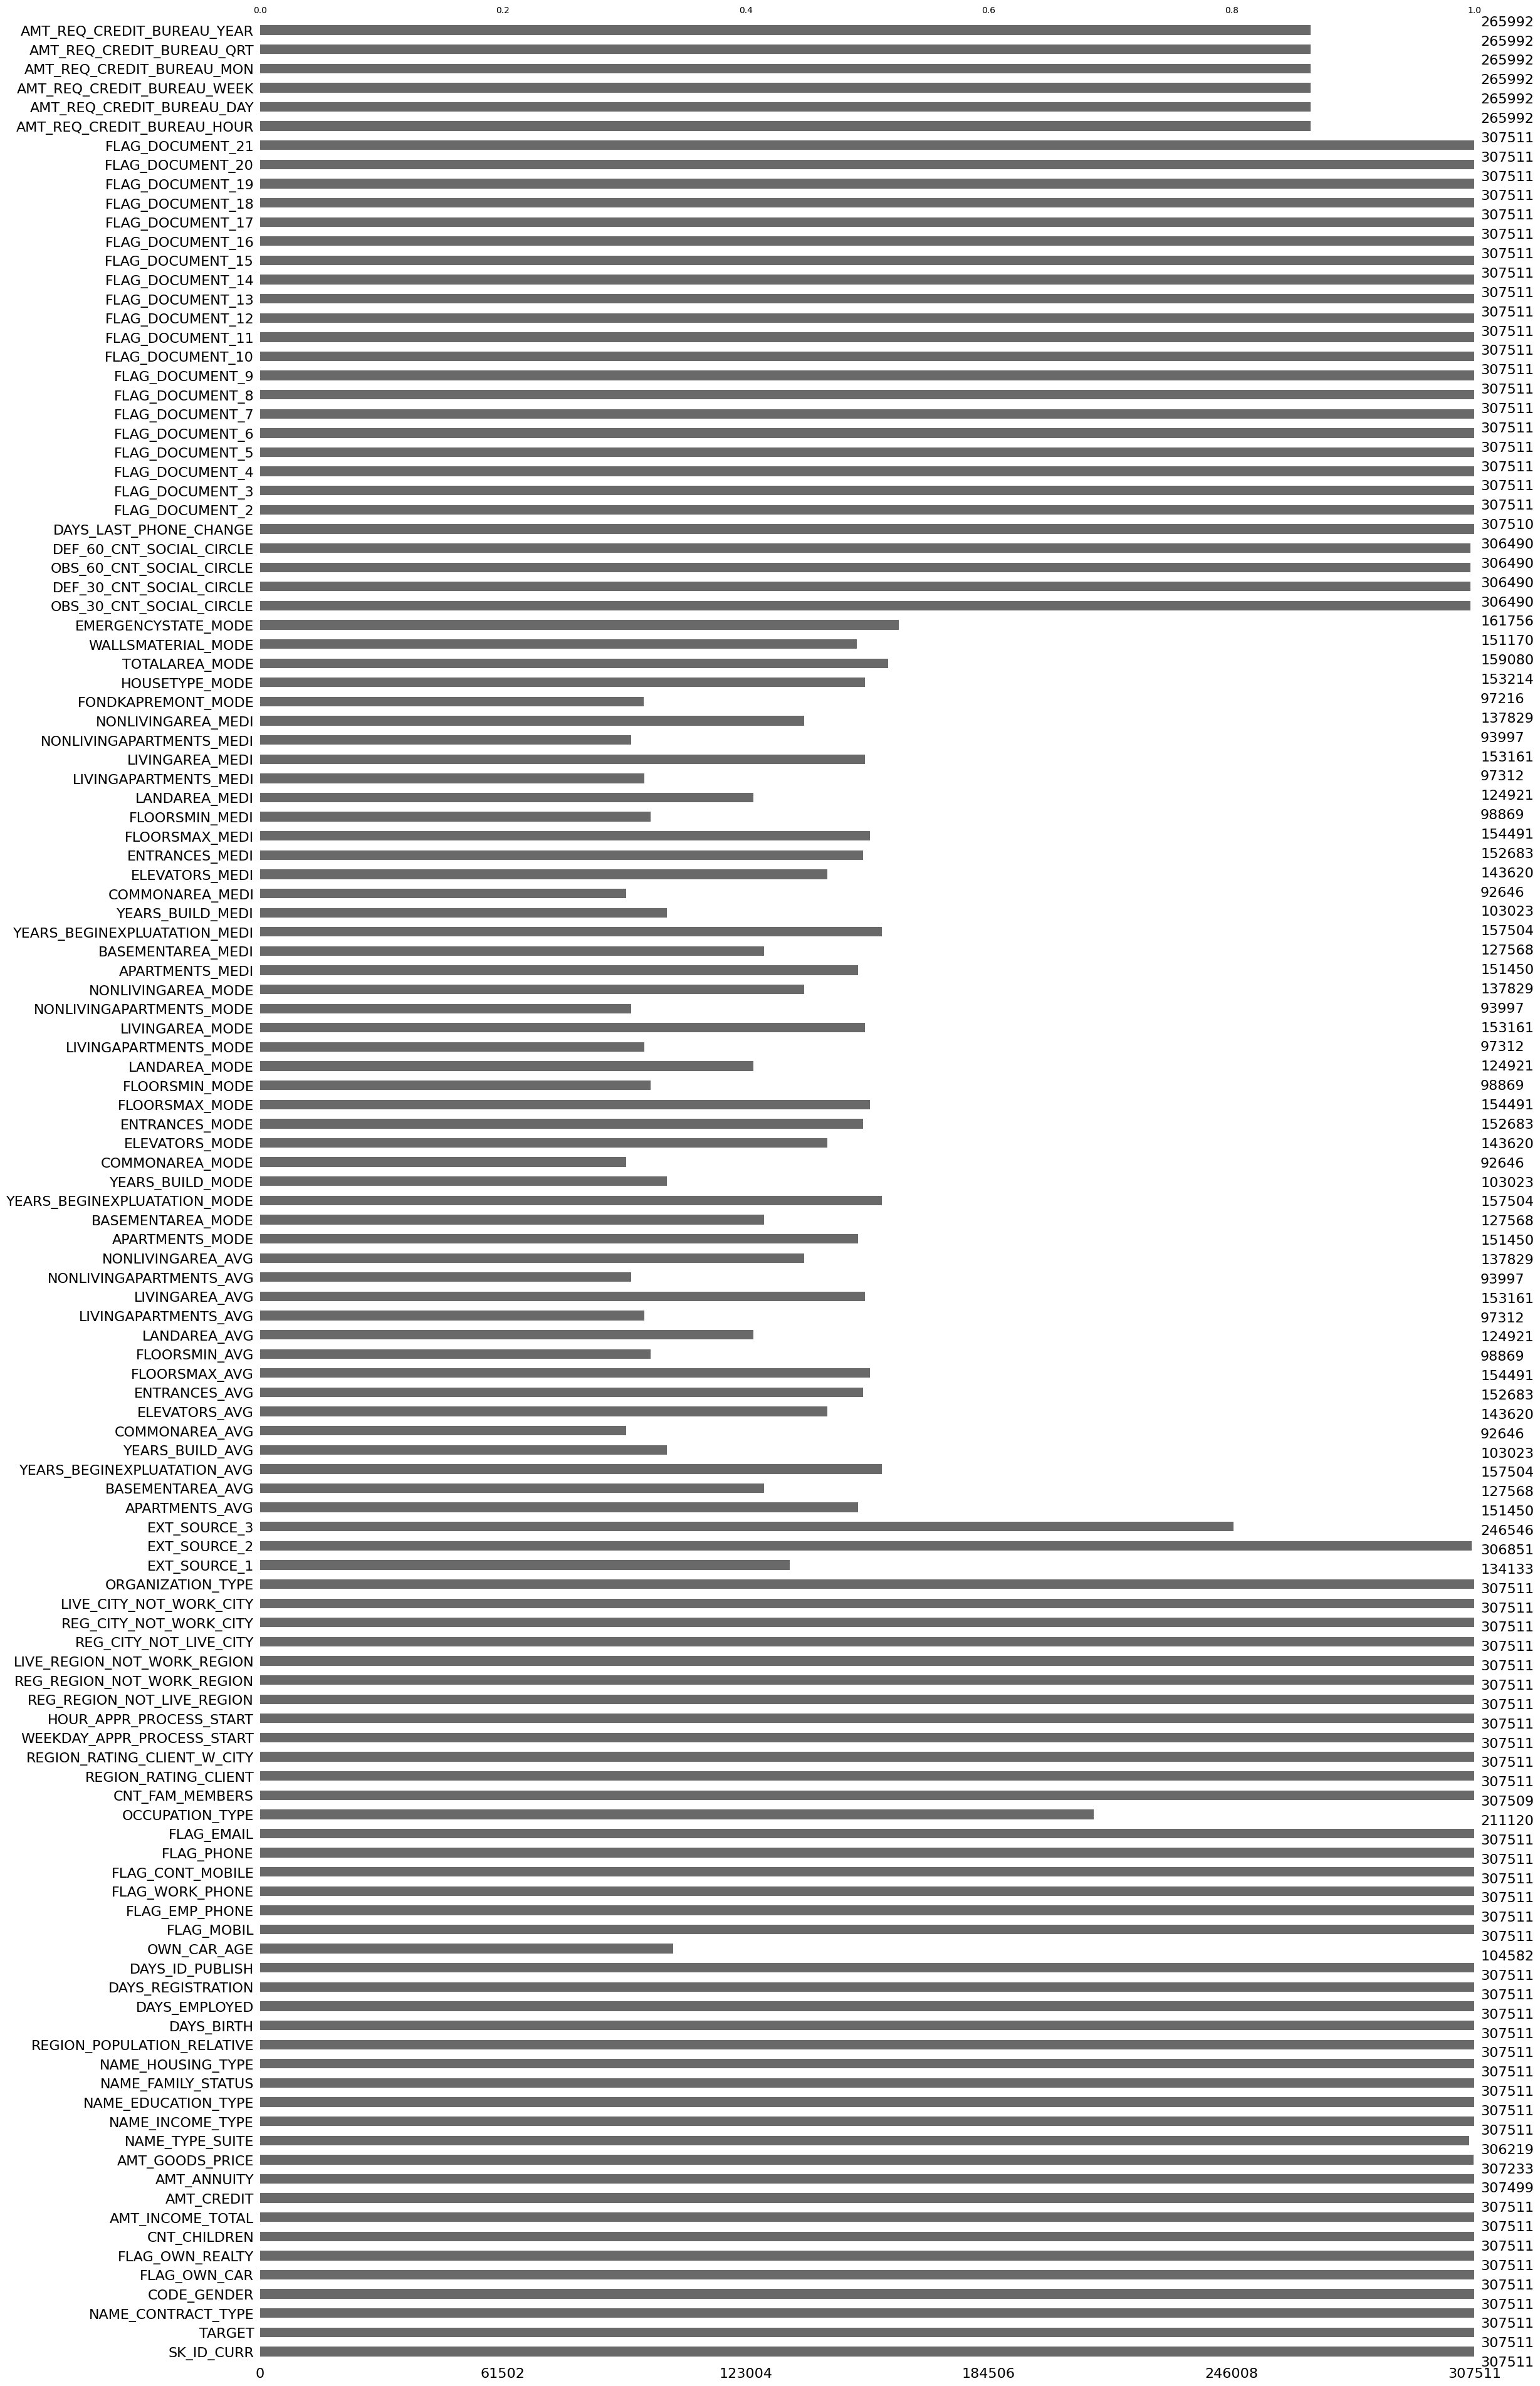

In [205]:
msno.bar(app_train);

In [159]:
# Columns that are the most empty
tmp = app_train.isna().mean().sort_values(ascending=False).head(20)
tmp

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
LANDAREA_MEDI               0.593767
BASEMENTAREA_MODE           0.585160
dtype: float64

In [160]:
tmp.index

Index(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG',
       'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_AVG',
       'LANDAREA_MODE', 'LANDAREA_MEDI', 'BASEMENTAREA_MODE'],
      dtype='object')

<div class="alert alert-block alert-warning">
<b>Comment : </b></div>

most of the columns contain NaN. We don't know yet which features are important, we will keep them all for now.

## Duplicates

In [207]:
app_train.duplicated().any()

False

In [208]:
app_train.duplicated(subset="SK_ID_CURR").any()

False

In [209]:
## Correcting dtypes

## Outliers and anomalies

### Z-score and boxplot detection

AMT_INCOME_TOTAL              492.703449
AMT_REQ_CREDIT_BUREAU_QRT     350.470589
OBS_30_CNT_SOCIAL_CIRCLE      144.506214
OBS_60_CNT_SOCIAL_CIRCLE      144.117631
AMT_REQ_CREDIT_BUREAU_MON      31.242339
CNT_CHILDREN                   25.733871
CNT_FAM_MEMBERS                19.597532
AMT_ANNUITY                    15.931509
AMT_REQ_CREDIT_BUREAU_YEAR     12.585586
OWN_CAR_AGE                     9.645167
AMT_GOODS_PRICE                 9.501557
AMT_CREDIT                      8.574059
DAYS_REGISTRATION               5.588007
DAYS_LAST_PHONE_CHANGE          4.026504
HOUR_APPR_PROCESS_START         3.693833
DAYS_ID_PUBLISH                 2.784328
DAYS_EMPLOYED                   2.133617
DAYS_BIRTH                      2.106335
dtype: float64


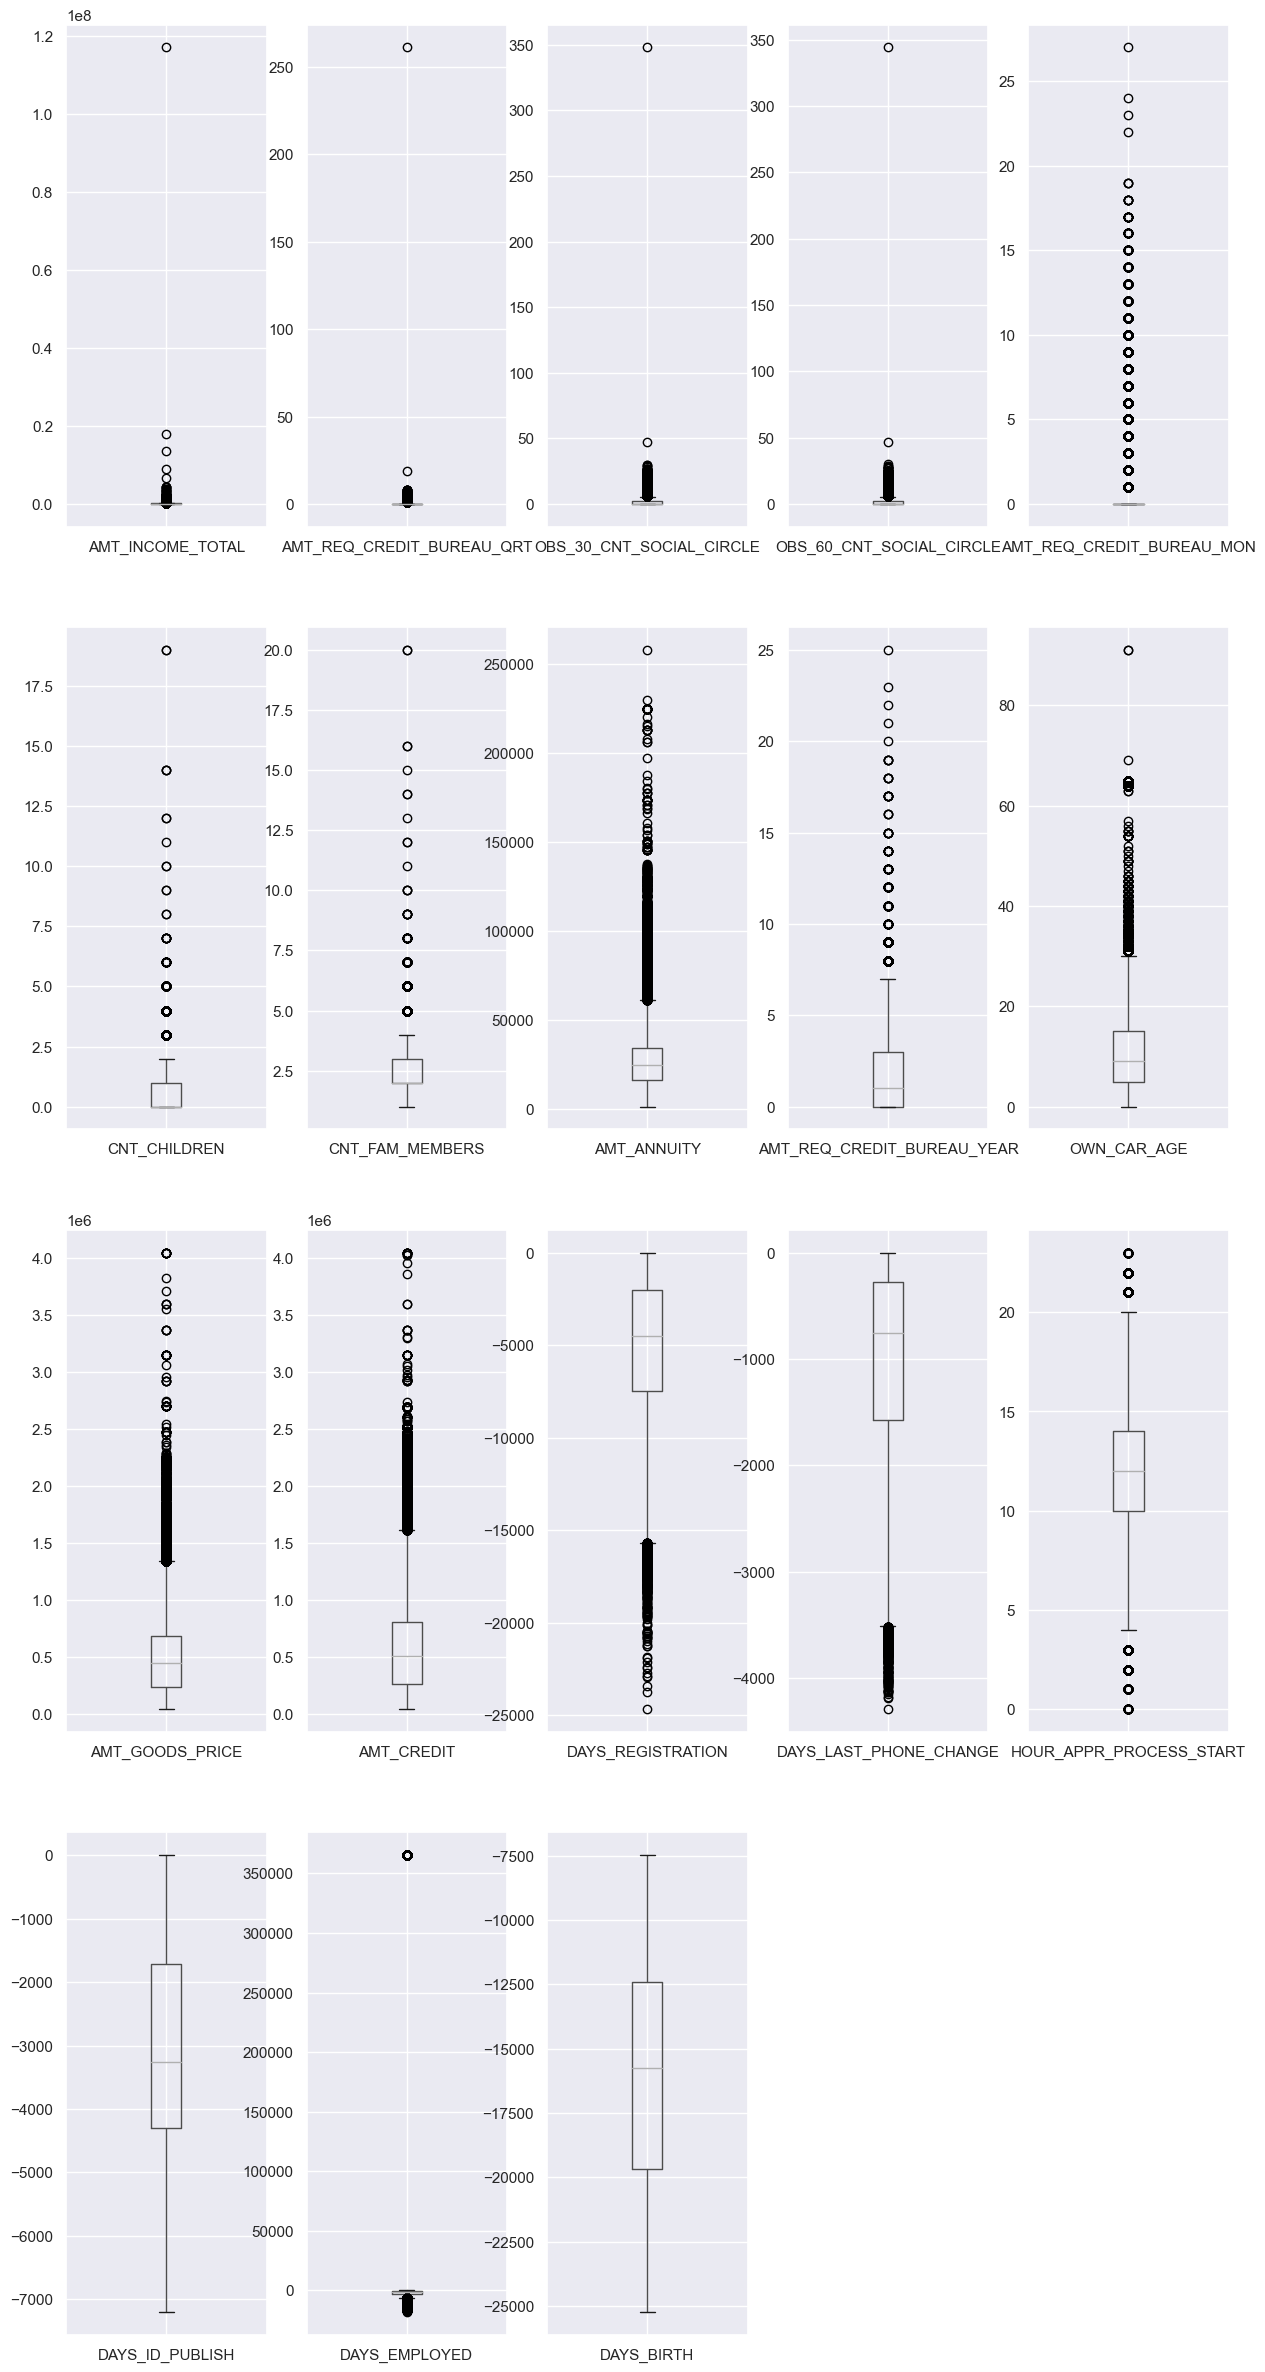

In [29]:
# Print boxplots for all numeric features
# filter out categorial num features
num_col = app_train.select_dtypes(np.number).nunique() > 10
num_col = num_col[num_col].index

# filter features with 0 to 1 values
bool_features = (app_train[num_col].max() - app_train[num_col].min()) <= 1
not_bool_features = bool_features[~bool_features].index

# select features with high Z-Score
feature_has_outliers = (
    scipy.stats.zscore(app_train[not_bool_features].fillna(0)).abs().max()
).sort_values(ascending=False)
feature_has_outliers = feature_has_outliers[feature_has_outliers > 2]

subset = feature_has_outliers.index
PLOT_LINES = len(subset)
PLOT_COL = 5
plt.figure(figsize=(15, 20))
for i, col in enumerate(app_train[subset]):
    plt.subplot(PLOT_LINES // PLOT_COL + 1, PLOT_COL, i + 1)
    app_train.boxplot(column=col)

print(feature_has_outliers.sort_values(ascending=False))

<div class="alert alert-block alert-info">
<b>Comment : </b></div>

Detected outliers :
- `AMT_INCOME_TOTAL` : outlier but possibly real value
- `AMT_REQ_CREDIT_BUREAU_QRT` : outlier but possibly real value
- `OBS_30_CNT_SOCIAL_CIRCLE` : outlier but possibly real value
- `OBS_60_CNT_SOCIAL_CIRCLE` : outlier but possibly real value
- `DAYS_EMPLOYED` : impossible value, needs fixing


In [212]:
get_definition("OBS_30_CNT_SOCIAL_CIRCLE")

OBS_30_CNT_SOCIAL_CIRCLE
Description  How many observation of client's social surroundings with observable 30 DPD (days past due) default
Special                                                                                                      NaN
Table                                                                               application_{train|test}.csv

### Impossible values

In [213]:
# Detect features with both positive and negative values
values_positive_and_negative = (
    app_train.select_dtypes(np.number).min() * app_train.select_dtypes(np.number).max()
) < 0
values_positive_and_negative[values_positive_and_negative]

DAYS_EMPLOYED    True
dtype: bool

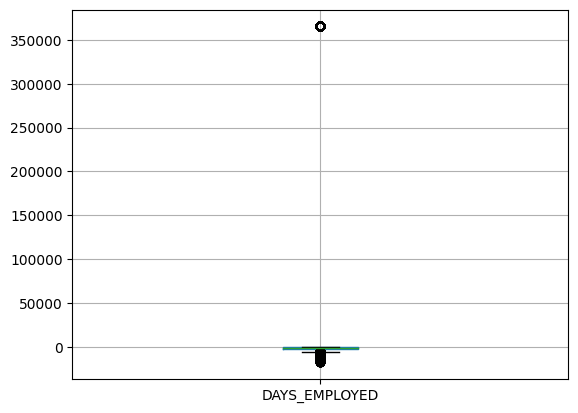

In [214]:
app_train.boxplot(column="DAYS_EMPLOYED");

### By col name

In [215]:
def cols_containing(string):
    """
    Returns list of column names that contain a pattern.
    """
    return app_train.columns[app_train.columns.str.contains(string.upper())].to_list()

In [216]:
# check for impossible values in time variables
app_train[cols_containing("year")].describe()

YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  \
count                157504.000000    103023.000000   
mean                      0.977735         0.752471   
std                       0.059223         0.113280   
min                       0.000000         0.000000   
25%                       0.976700         0.687200   
50%                       0.981600         0.755200   
75%                       0.986600         0.823200   
max                       1.000000         1.000000   

       YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
count                 157504.000000     103023.000000   
mean                       0.977065          0.759637   
std                        0.064575          0.110111   
min                        0.000000          0.000000   
25%                        0.976700          0.699400   
50%                        0.981600          0.764800   
75%                        0.986600          0.823600   
max                        1.000000          1.000000   

       YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
count                 157504.000000     103023.000000   
mean                       0.977752          0.755746   
std                        0.059897          0.112066   
min                        0.000000          0.000000   
25%                        0.976700          0.691400   
50%                        0.981600          0.758500   
75%                        0.986600          0.825600   
max                        1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count               265992.000000  
mean                     1.899974  
std                      1.869295  
min                      0.000000  
25%                      0.000000  
50%                      1.000000  
75%                      3.000000  
max                     25.000000

In [217]:
# convert negative days to years
(app_train[cols_containing("days")] / -365).describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean       43.936973    -174.835742          13.660604         8.203294   
std        11.956133     387.056895           9.651743         4.135481   
min        20.517808   -1000.665753          -0.000000        -0.000000   
25%        34.008219       0.791781           5.506849         4.712329   
50%        43.150685       3.323288          12.339726         8.915068   
75%        53.923288       7.561644          20.491781        11.778082   
max        69.120548      49.073973          67.594521        19.717808   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean                 2.637969  
std                  2.265229  
min                 -0.000000  
25%                  0.750685  
50%                  2.073973  
75%                  4.301370  
max                 11.758904

<div class="alert alert-block alert-danger">
<b>Comment : </b>Min value of -1000 years employed is impossible, is it a single outlier or a common value?</div>

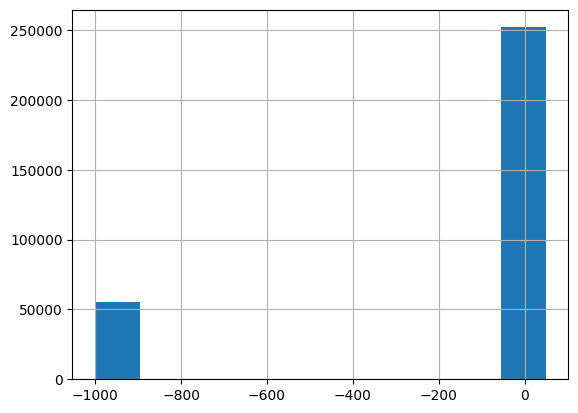

In [218]:
(app_train.DAYS_EMPLOYED / -365).hist();

### Fixing Outliers

In [97]:
# Replace Outliers value by imputing NaN and add flag to keep track
app_train["FLAG_ANOMALY_DAYS_EMPLOYED"] = app_train.DAYS_EMPLOYED > 365 * 100
outlier_value = app_train.DAYS_EMPLOYED.max()
app_train.DAYS_EMPLOYED.replace(outlier_value, np.nan, inplace=True)

In [98]:
# same for app_test
app_test["FLAG_ANOMALY_DAYS_EMPLOYED"] = app_test.DAYS_EMPLOYED > 365 * 100
outlier_value = app_test.DAYS_EMPLOYED.max()
app_test.DAYS_EMPLOYED.replace(outlier_value, np.nan, inplace=True)

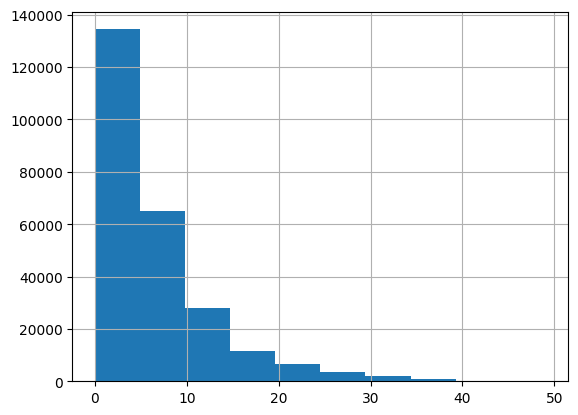

In [220]:
(app_train.DAYS_EMPLOYED / -365).hist();

In [221]:
app_train[(app_train.AMT_INCOME_TOTAL > 1000000)].AMT_INCOME_TOTAL.shape

(250,)

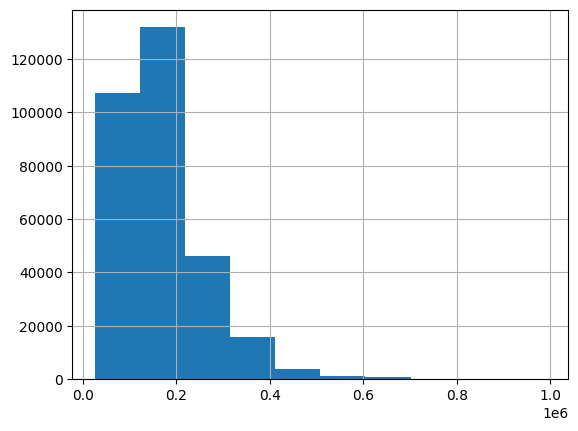

In [222]:
# Print dist of AMT_INCOME_TOTAL without extreme outliers for better visibility
app_train[(app_train.AMT_INCOME_TOTAL < 1000000)].AMT_INCOME_TOTAL.hist();

# Feature engineering

## Label Encoding for categories with 2 labes

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le = LabelEncoder()

for col in app_train:
    if app_train[col].dtype == "object":
        if app_train[col].nunique(dropna=False) <= 2:
            print(col, app_train[col].unique())
            app_train[col] = le.fit_transform(app_train[col])
            app_test[col] = le.fit_transform(app_test[col])
            print(col, app_train[col].unique())

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
NAME_CONTRACT_TYPE [0 1]
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_CAR [0 1]
FLAG_OWN_REALTY ['Y' 'N']
FLAG_OWN_REALTY [1 0]


## One-Hot encoding for categories with more than 2 labels

In [101]:
app_train.dtypes.value_counts()

float64    66
int64      43
object     13
bool        1
Name: count, dtype: int64

In [102]:
app_train.select_dtypes("object").nunique(dropna=False)

CODE_GENDER                    3
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64

In [103]:
print(app_train.shape)
app_train = pd.get_dummies(app_train)
print(app_train.shape)

(307511, 123)
(307511, 244)


In [104]:
print(app_test.shape)
app_test = pd.get_dummies(app_test)
print(app_test.shape)

(48744, 122)
(48744, 240)


In [105]:
# sns.displot(np.log1p(app_train.AMT_INCOME_TOTAL.sample(frac=0.05)));

## Financial features using Kaggle Kernel

In [106]:
# from https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features
# Some simple new features (percentages)
app_train["FE_DAYS_EMPLOYED_PERC"] = (
    app_train["DAYS_EMPLOYED"] / app_train["DAYS_BIRTH"]
)
app_train["FE_INCOME_CREDIT_PERC"] = (
    app_train["AMT_INCOME_TOTAL"] / app_train["AMT_CREDIT"]
)
app_train["FE_INCOME_PER_PERSON"] = (
    app_train["AMT_INCOME_TOTAL"] / app_train["CNT_FAM_MEMBERS"]
)
app_train["FE_ANNUITY_INCOME_PERC"] = (
    app_train["AMT_ANNUITY"] / app_train["AMT_INCOME_TOTAL"]
)
app_train["FE_PAYMENT_RATE"] = app_train["AMT_ANNUITY"] / app_train["AMT_CREDIT"]

# same for app_test
app_test["FE_DAYS_EMPLOYED_PERC"] = app_test["DAYS_EMPLOYED"] / app_test["DAYS_BIRTH"]
app_test["FE_INCOME_CREDIT_PERC"] = (
    app_test["AMT_INCOME_TOTAL"] / app_test["AMT_CREDIT"]
)
app_test["FE_INCOME_PER_PERSON"] = (
    app_test["AMT_INCOME_TOTAL"] / app_test["CNT_FAM_MEMBERS"]
)
app_test["FE_ANNUITY_INCOME_PERC"] = (
    app_test["AMT_ANNUITY"] / app_test["AMT_INCOME_TOTAL"]
)
app_test["FE_PAYMENT_RATE"] = app_test["AMT_ANNUITY"] / app_test["AMT_CREDIT"]

# Graphical analysis

## Numerical features

### Univariate analysis

#### Histograms

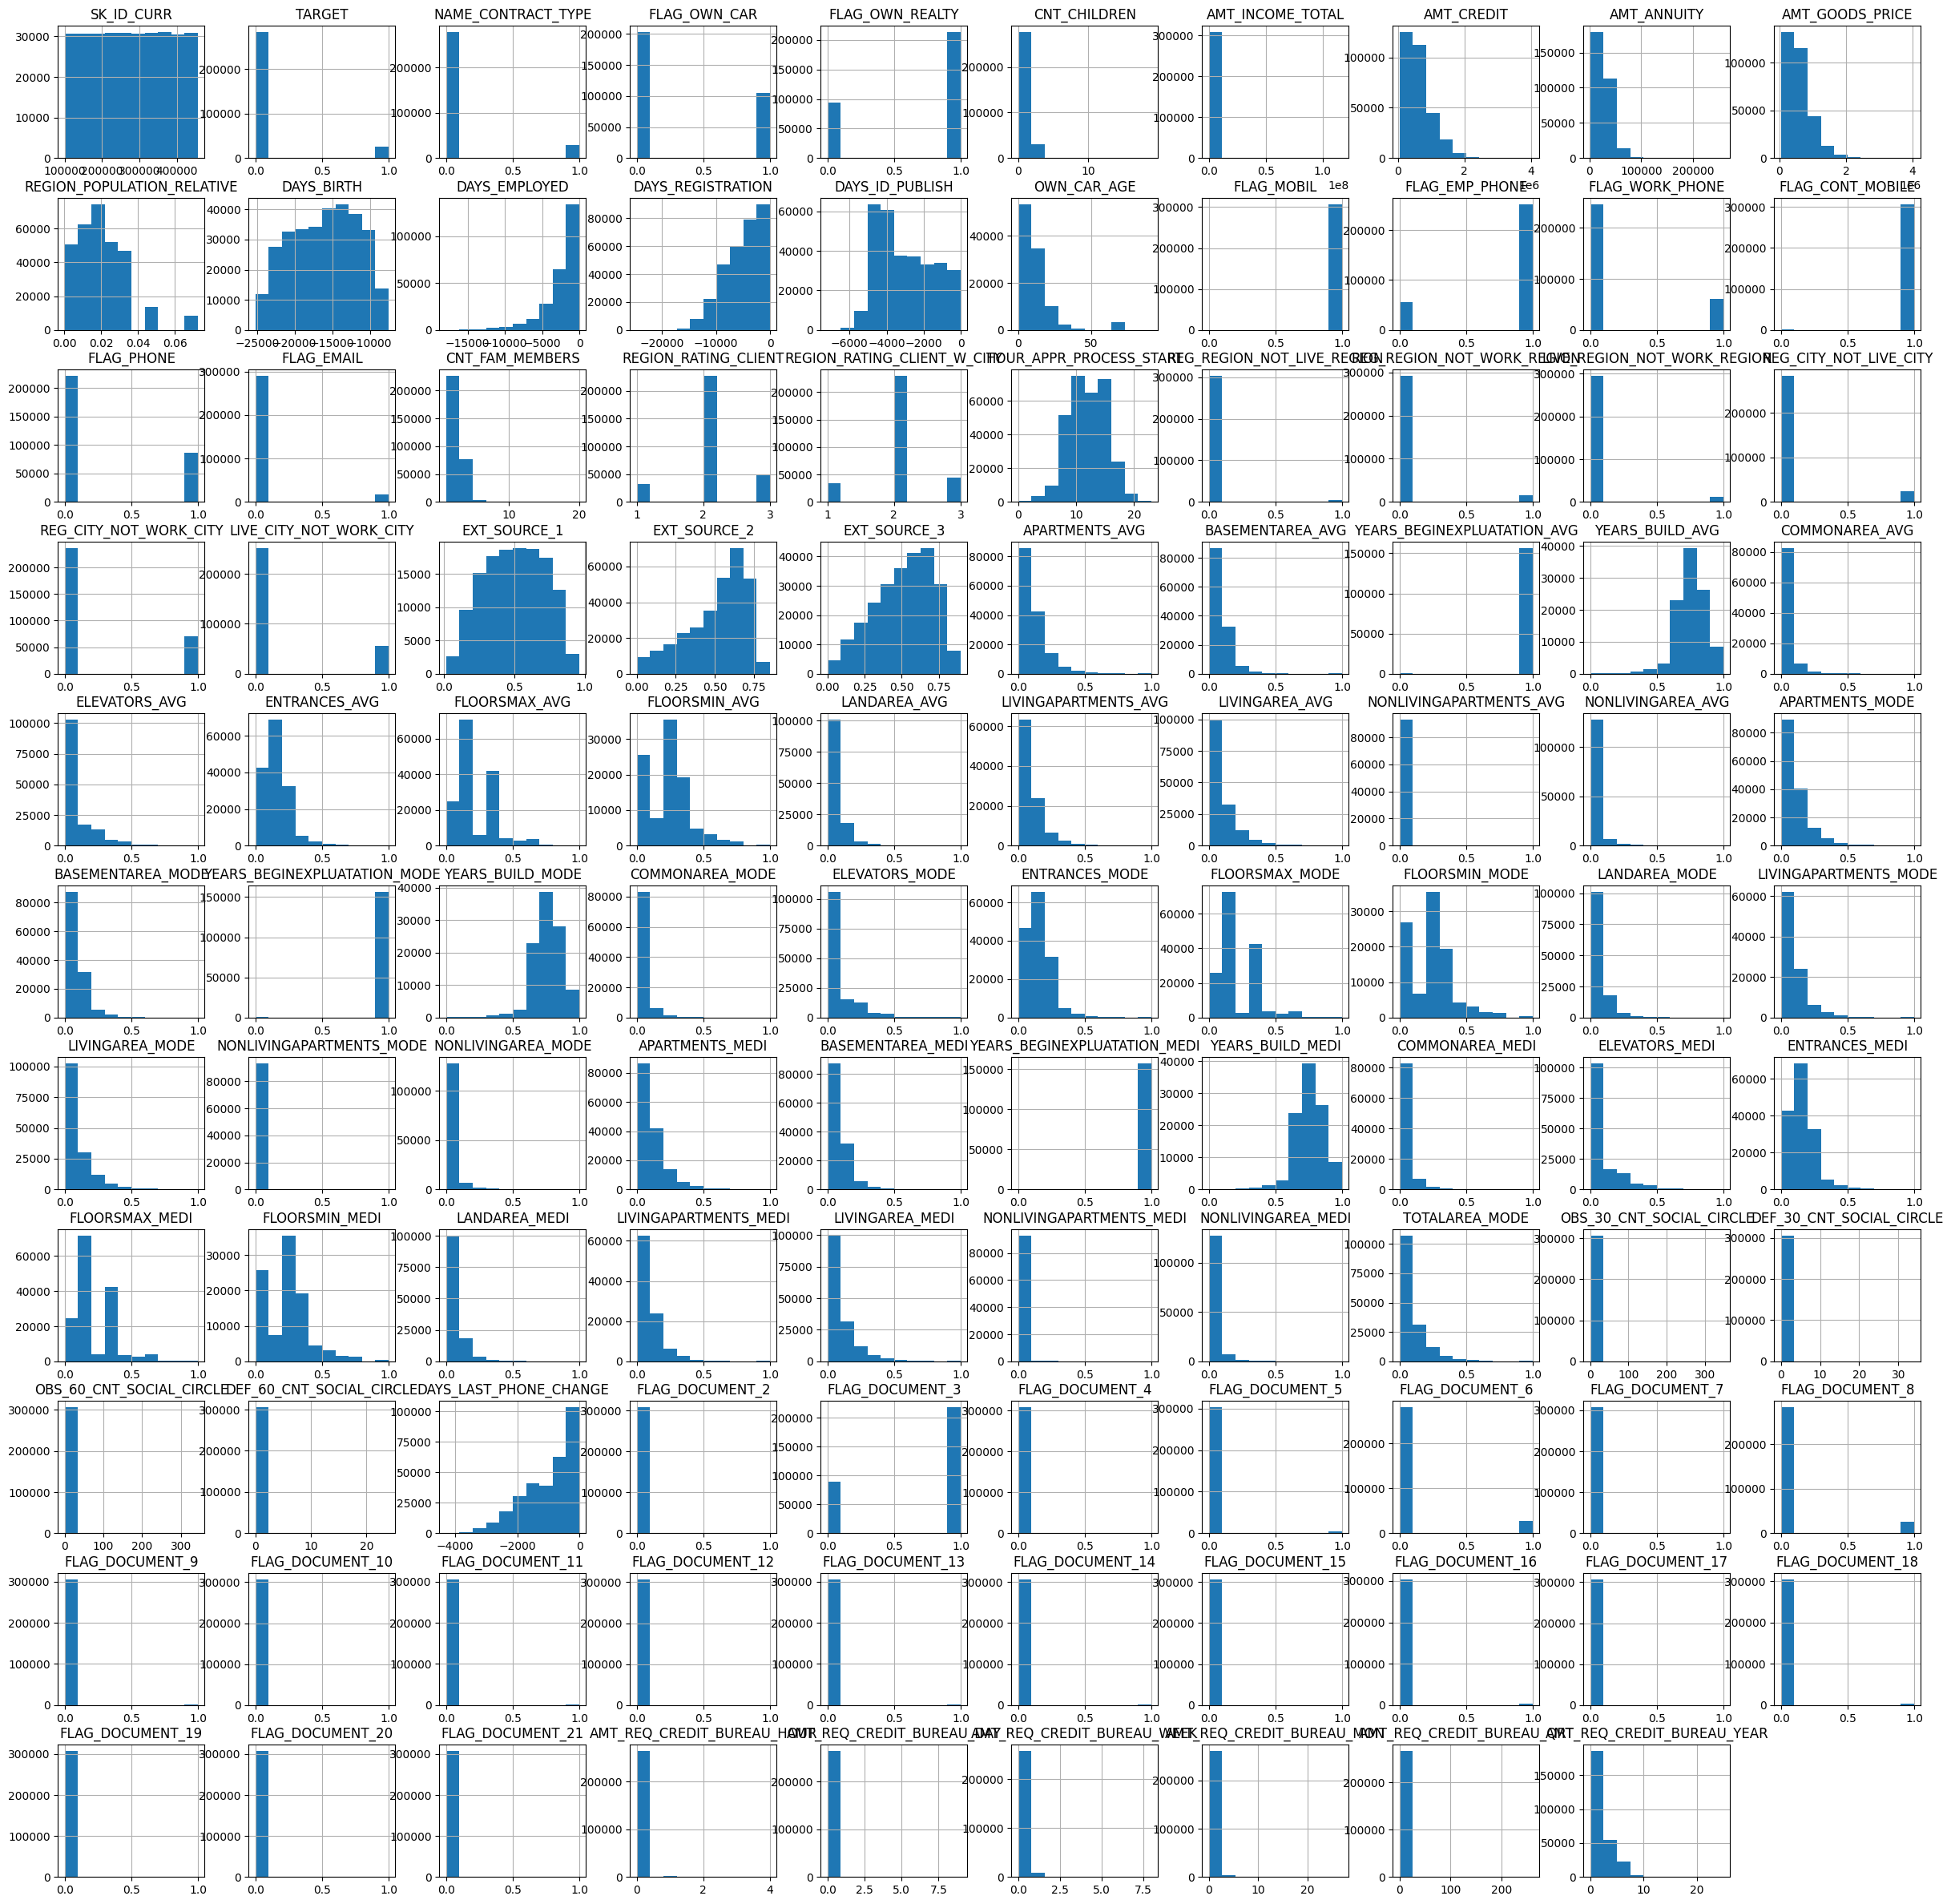

In [237]:
app_train.select_dtypes(exclude=bool).hist(figsize=(30, 30));

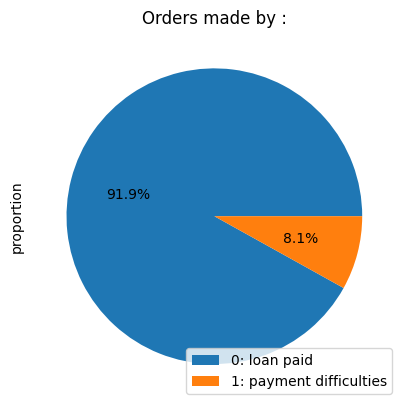

In [238]:
# Target
app_train.TARGET.value_counts(normalize=True).plot(
    kind="pie",
    autopct="%1.1f%%",
    labels=None,
    title="Orders made by :",
)
plt.legend(["0: loan paid", "1: payment difficulties"], loc="lower right");

#### Line Plots

### Bivariate analysis

#### Correlation Matrix

In [37]:
# Select only features with highest correlation to target
top_target_corr = (
    app_train.corrwith(app_train.TARGET)
    .abs()
    .sort_values(ascending=False)
    .head(15)
    .index
)

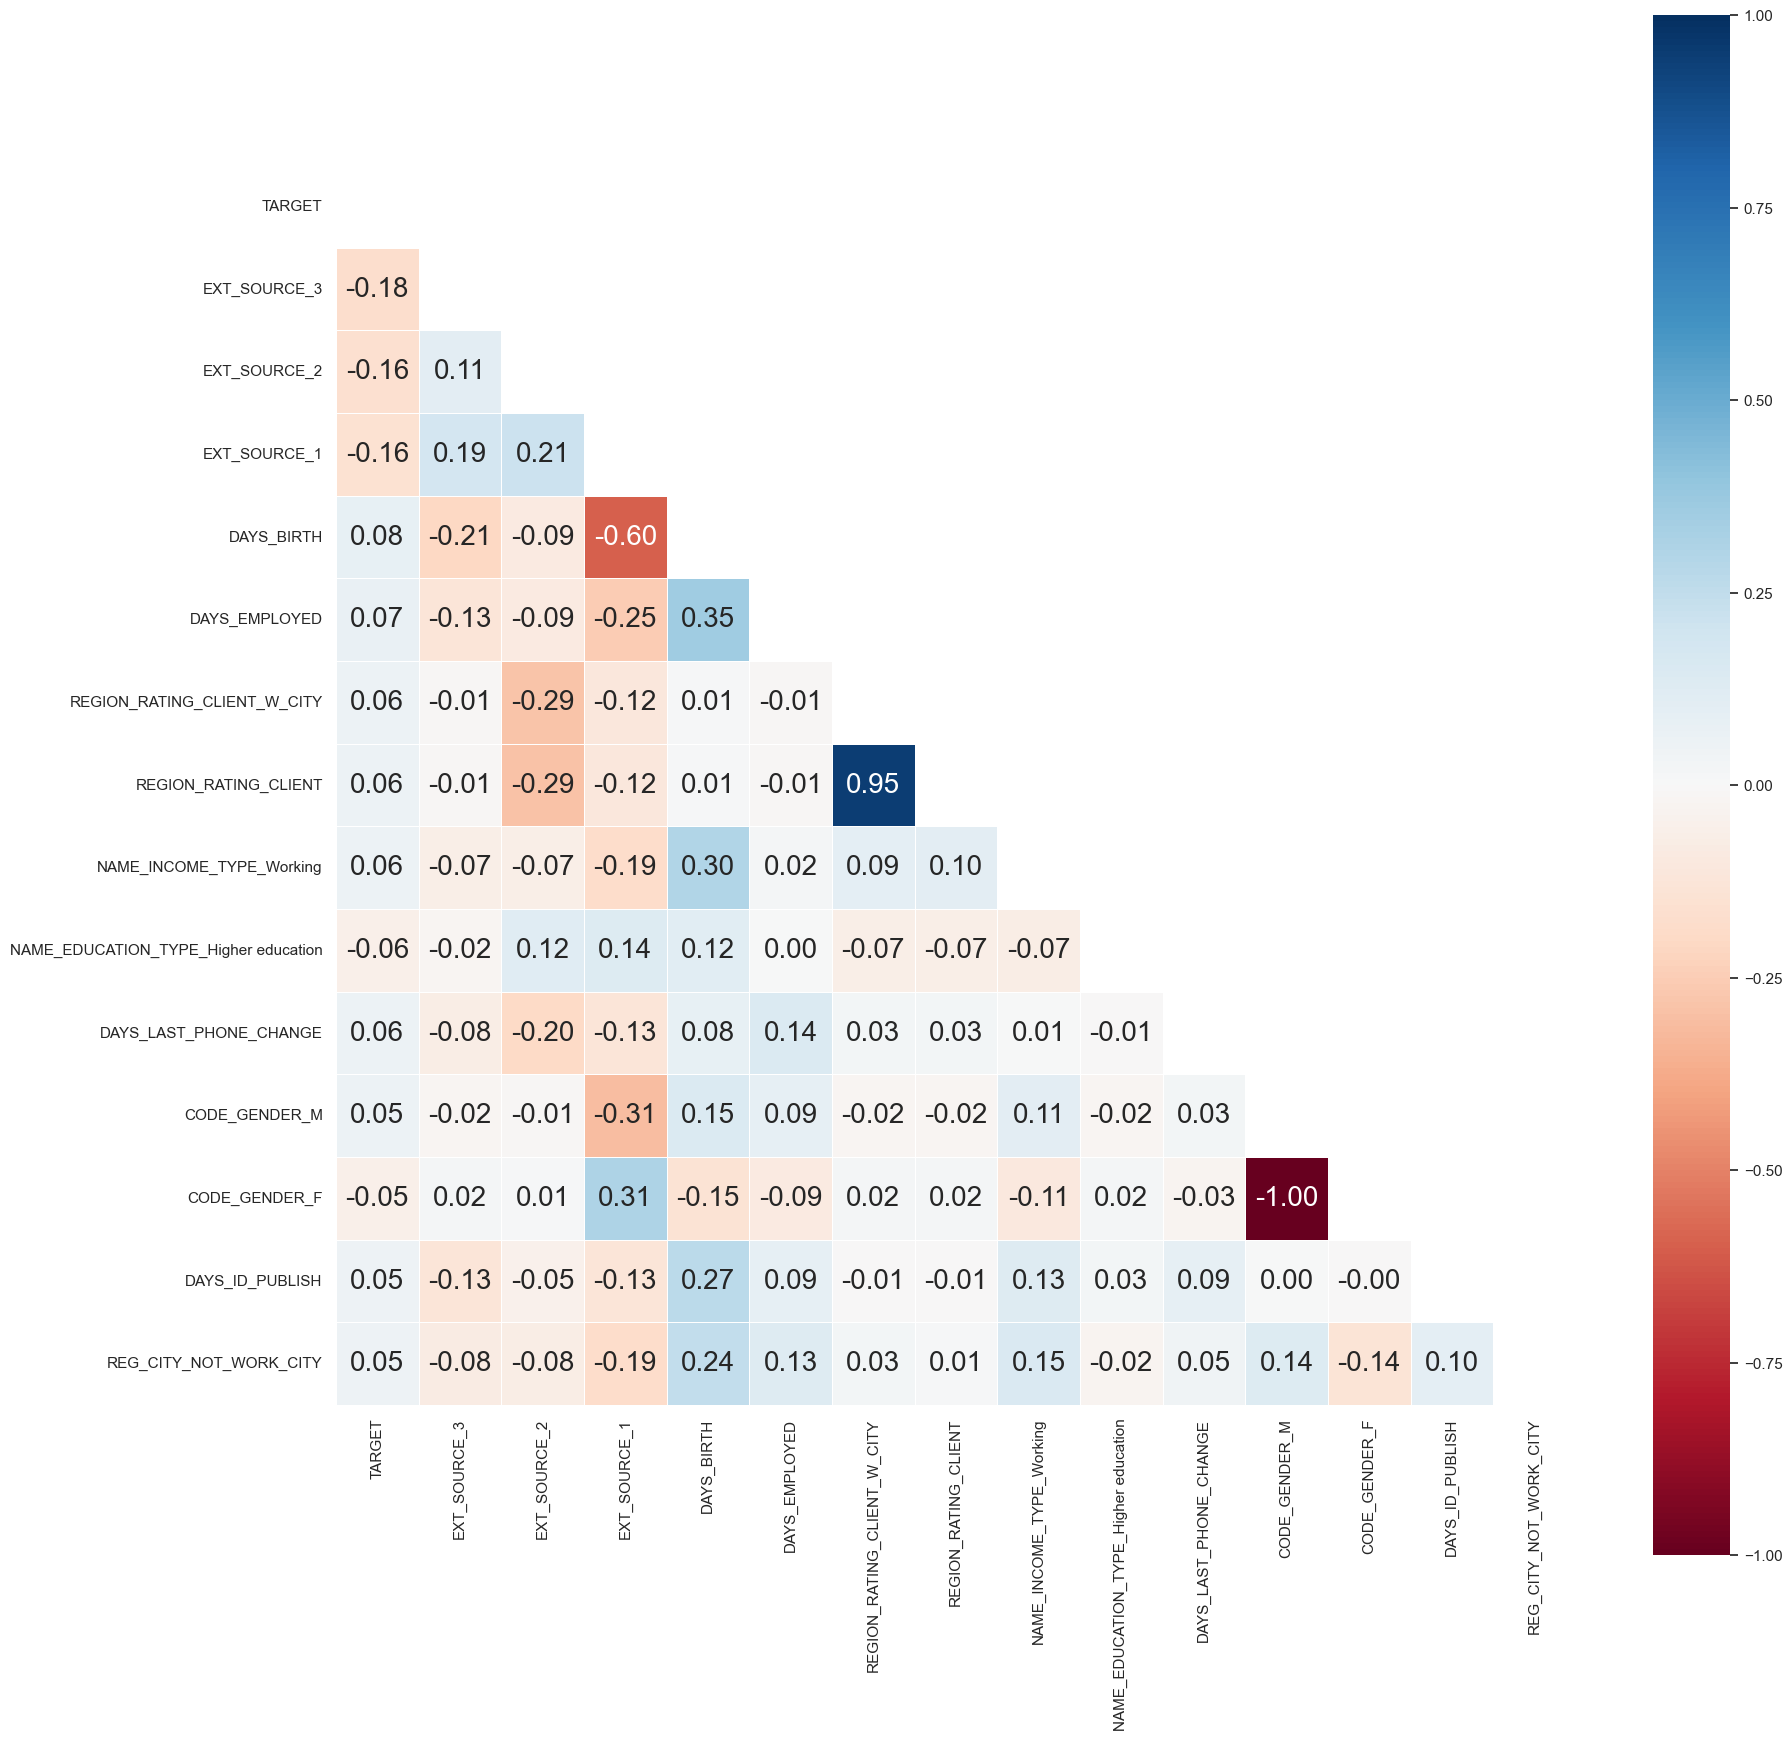

In [267]:
plt.figure(figsize=(20, 20))
sns.set_theme(style="white")  # for white background
sns.heatmap(
    app_train[top_target_corr].corr(),
    # shape
    mask=np.triu(app_train[top_target_corr].corr()),
    square=True,
    linewidths=0.6,
    # diverging colormap
    cmap=plt.cm.RdBu,
    center=0,
    vmin=-1,
    vmax=1,
    # annotations
    annot=True,
    annot_kws={"size": 20},
    fmt=".2f",
    # cbar_kws={"shrink": 0.5},
);

In [58]:
get_definition("EXT_SOURCE_3")

EXT_SOURCE_3
Description  Normalized score from external data source
Special                                      normalized
Table                      application_{train|test}.csv

#### Distributions by target

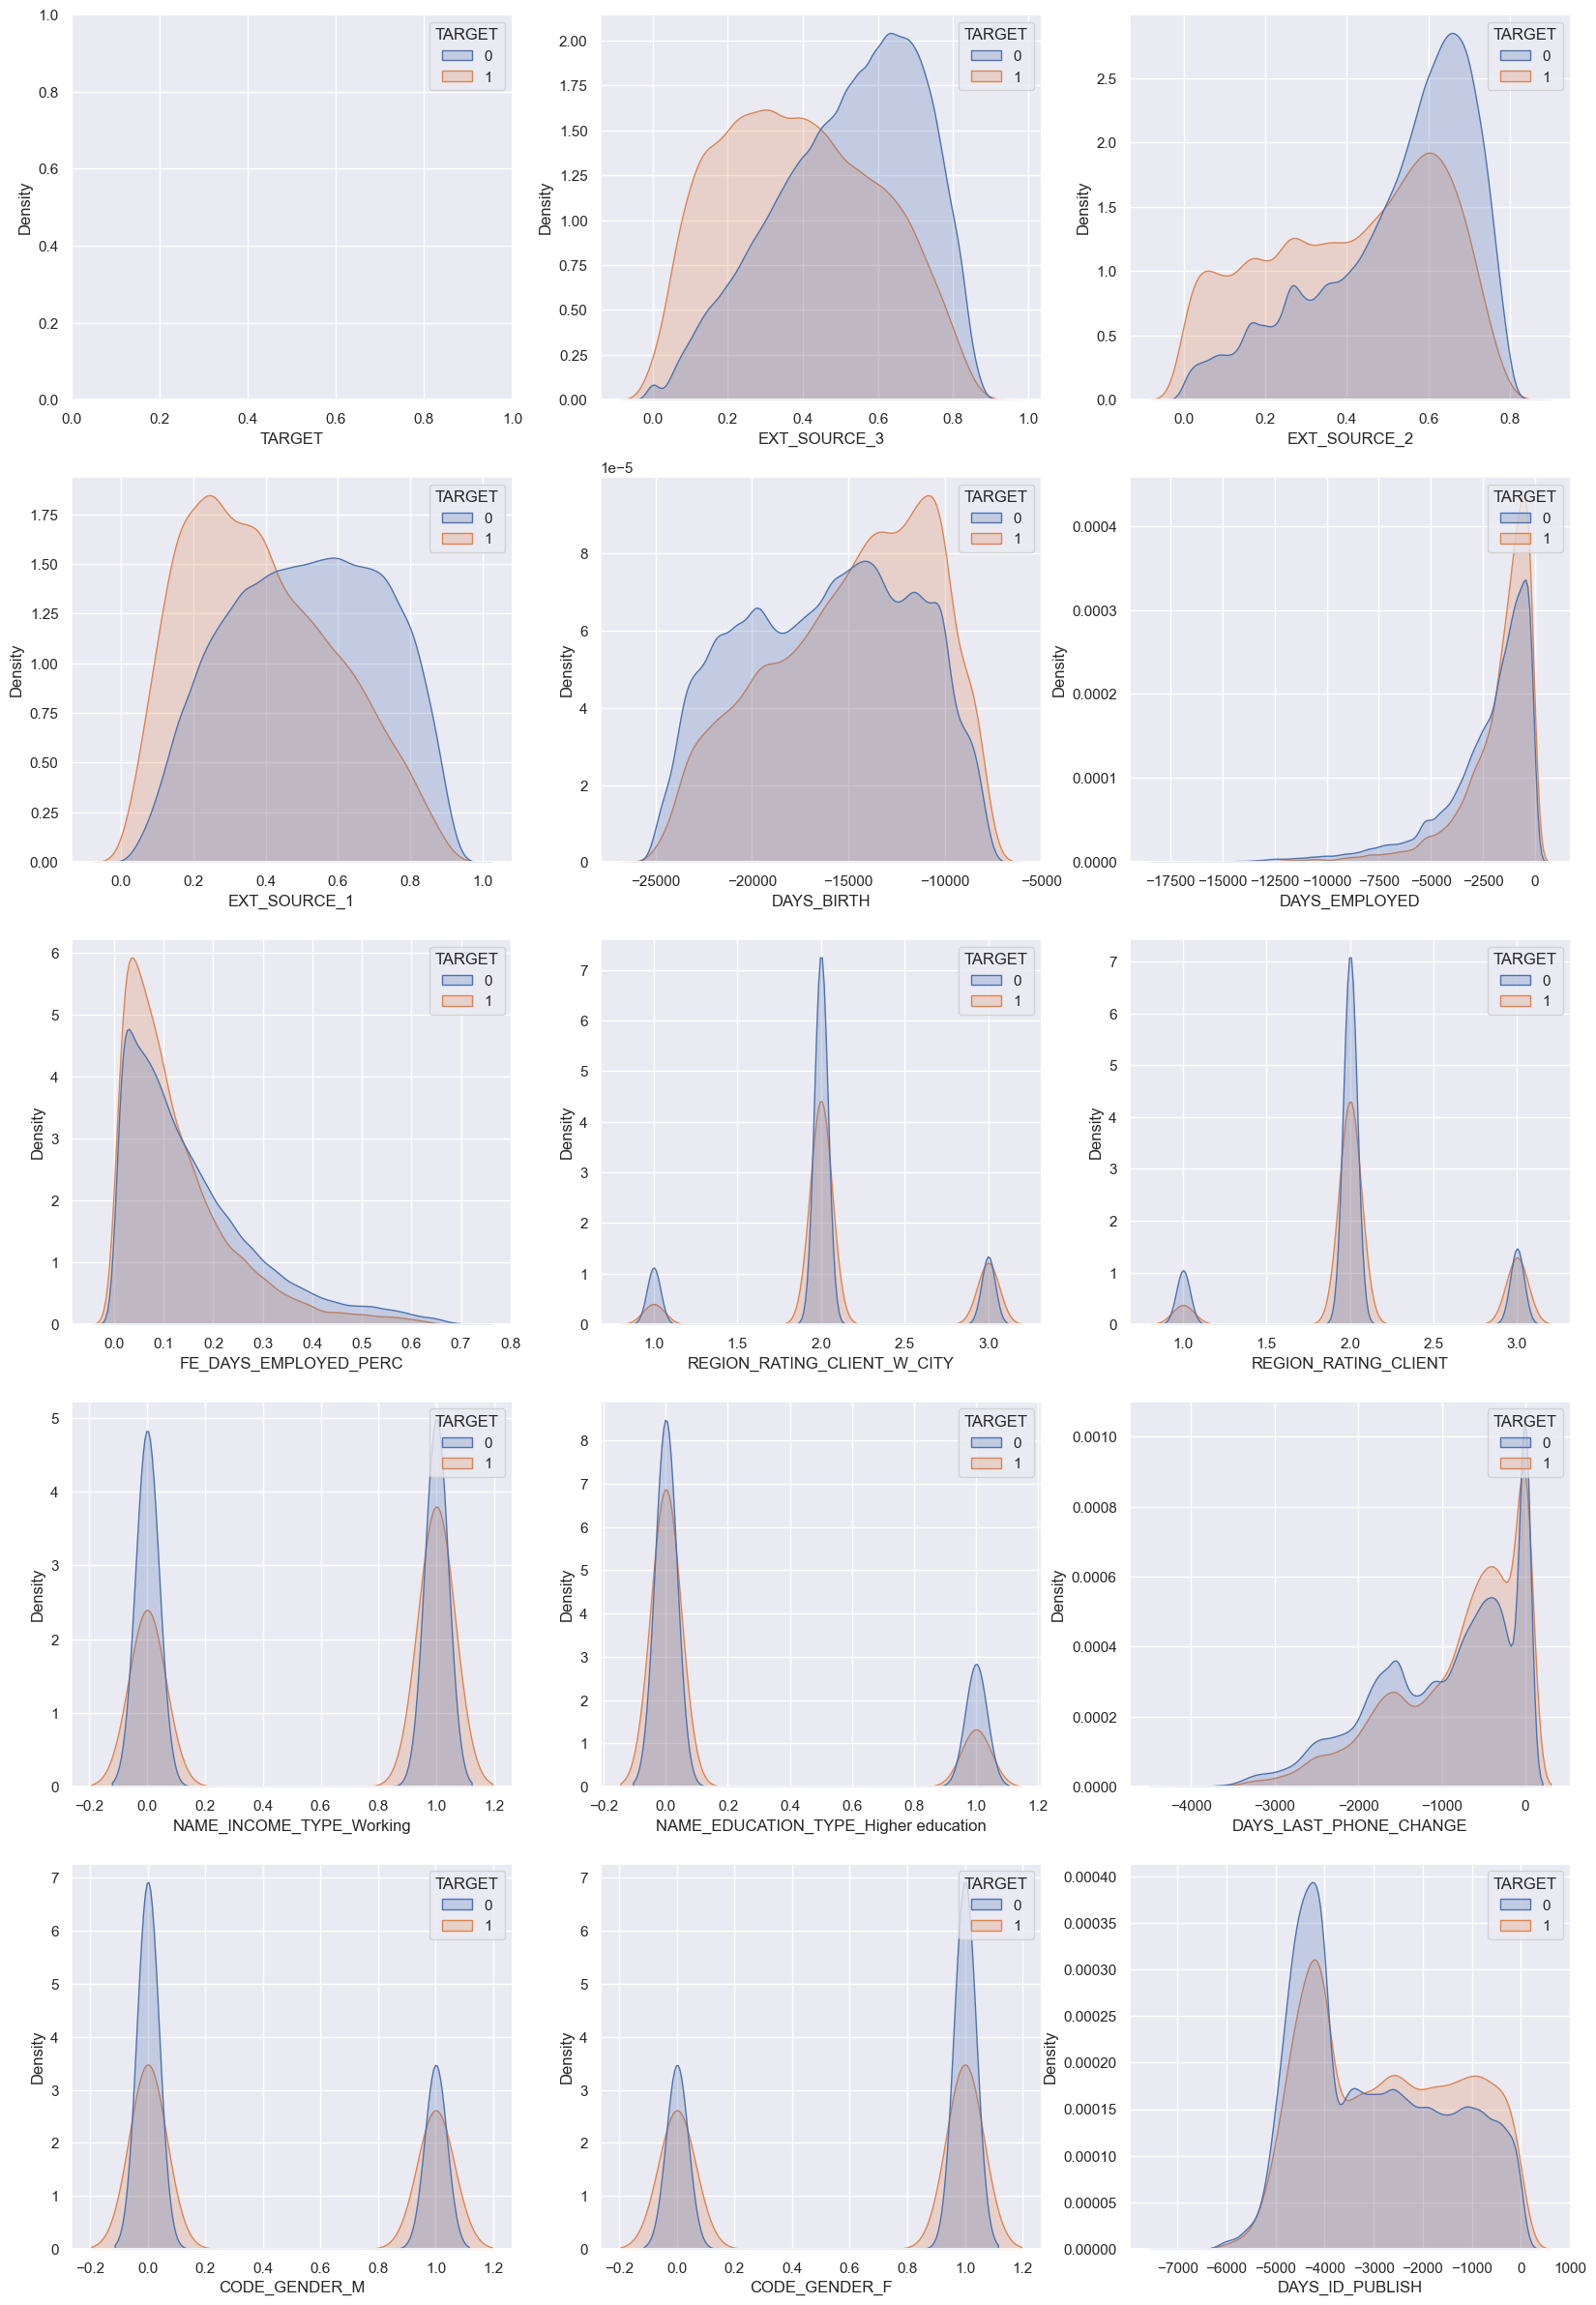

In [39]:
cols = 3
rows = int(len(top_target_corr) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))

for r in range(rows):
    for c in range(cols):
        sns.kdeplot(
            app_train[top_target_corr],
            x=top_target_corr[r * 3 + c],
            hue="TARGET",
            fill=True,
            common_norm=False,
            ax=axes[r, c],
            warn_singular=False,
        );

In [ ]:
sns.pairplot()

## Categorical features

### Univariate analysis

#### Cardinality

#### Tops

### Bivariate analysis

#### ANOVA

In [84]:
# TODO

# Format columns

In [107]:
print("app_train shape : ", app_train.shape)
print("app_test shape : ", app_test.shape)

app_train shape :  (307511, 249)
app_test shape :  (48744, 245)


In [108]:
columns_diff = list(set(app_train.columns) - set(app_test.columns) - set(["TARGET"]))
columns_diff

['CODE_GENDER_XNA',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_FAMILY_STATUS_Unknown']

In [109]:
# cols of app_test not in app_train
list(set(app_test.columns) - set(app_train.columns) - set(["TARGET"]))

[]

In [110]:
# Drop train cols not in test
app_train.drop(columns_diff, axis=1, inplace=True)
app_train.shape

(307511, 246)

In [111]:
app_test.shape

(48744, 245)

# Preprocessing

<Axes: >

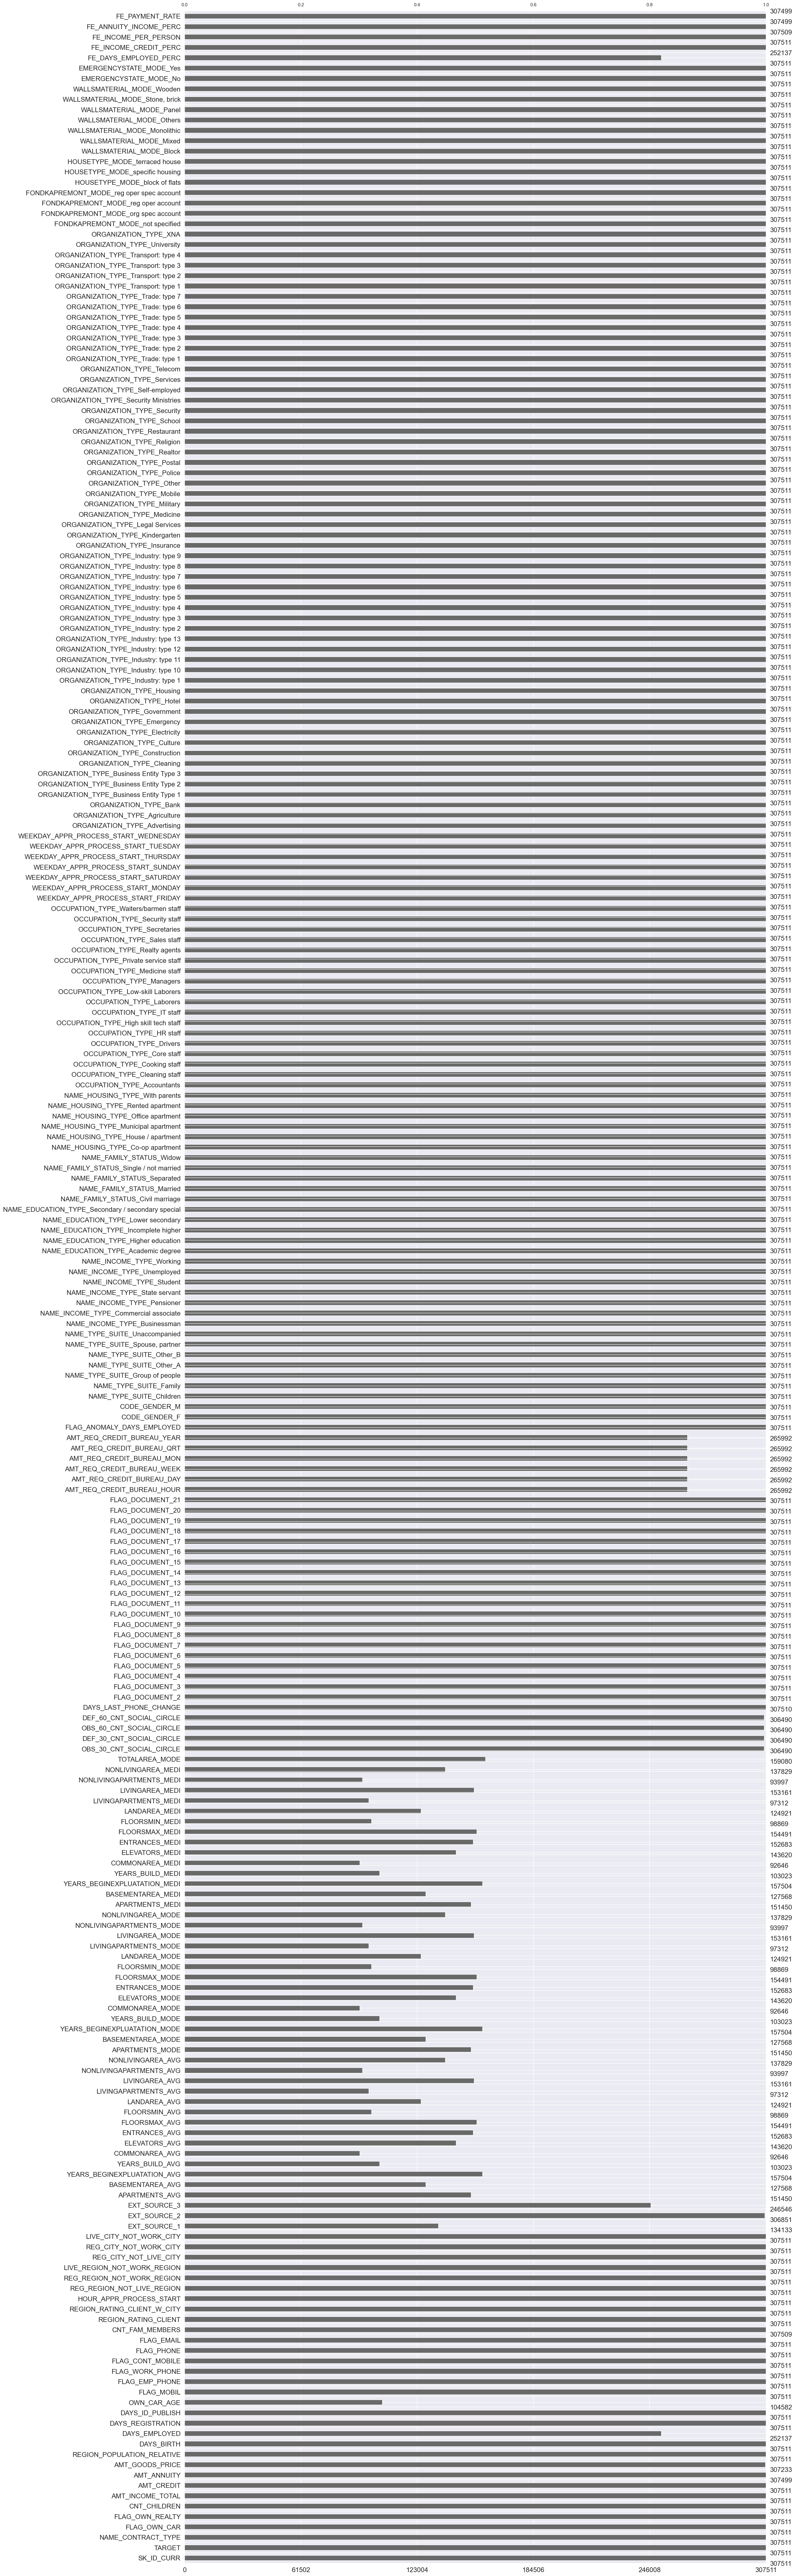

In [112]:
msno.bar(app_train)

In [114]:
app_train.dtypes.value_counts()

bool       132
float64     71
int64       43
Name: count, dtype: int64

## Split train test

In [177]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    app_train.drop("TARGET", axis=1), app_train.TARGET
)

In [161]:
# attention X   mais y (matrice != array)

In [143]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(230633, 245)
(76878, 245)
(230633,)
(76878,)


## Scaling

In [124]:
from sklearn import preprocessing

In [179]:
# Scaling
scaler = preprocessing.MinMaxScaler()
# fit on train
scaler.fit(X_train)
# transform train and test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Imputing

In [180]:
from sklearn.impute import SimpleImputer

In [181]:
# Imputing with mean
imputer = SimpleImputer(strategy="mean")

# Fit on train
imputer.fit(X_train)

# Transform train and test
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Modeling

## Logistic Regression

In [189]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = DummyClassifier()

# Train on the training data
log_reg.fit(X_train, Y_train)

DummyClassifier()

In [190]:
Y_pred = log_reg.predict(X_test)

In [191]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Scoring metric

In [192]:
Y_pred.mean()

0.0

In [196]:
Y_pred.values_count()

AttributeError: 'numpy.ndarray' object has no attribute 'values_count'

## TODO
### semaine pro :
- [ ] vscode
- [ ] github
- [ ] split notebooks EDA, preprocessing, modeling
- [ ] dir data, notebooks, requirement, readme, src/init.py fonctions
- [ ] problème imbalanced classes for training :
- [ ] manuellement équilibrer classes
### ensuite
- [ ] accuracy = 0 est modèle parfait si on inverse sa prédiction
- [ ] plus mauvais : 0.5
- [ ] KPI : accuracy ? matrice de confusion (rappel, précision, F-1 score, AUROC)
- [ ] 0 : prêt accordé, 1 : problème sur le prêt
- [ ] GridSearch(pipeline)
- [ ] rectifieur de classes dans le pipeline
- [ ] optimisation paramètres
- [ ] KPI monétaire pour patron à partir de taux d'intéret, bien saisis etc
- [ ] dashboard : streamlit plutôt que Dash

In [ ]:
sklearn.dummy.DummyClassifier()

In [194]:
metrics.accuracy_score(Y_test, Y_pred)

0.9193267254611203

In [168]:
[fpr, tpr, thr] = metrics.roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr, color="coral", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - specificite", fontsize=14)
plt.ylabel("Sensibilite", fontsize=14)

# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx = np.min(np.where(tpr > 0.95))

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1 - fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [156]:
from sklearn import metrics